In [92]:
!pip3 install pytrends
!pip3 install pyupbit
!pip3 install pyjwt
!pip3 install tensorflow
!pip3 install PyNaver

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [93]:
from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import date, datetime
# connect to google 

from pytrends.request import TrendReq

pytrends = TrendReq(hl='en-US', tz=360) 

# build payload

#keyword list
kw_list = ["bitcoin","Ethereum"] # list of keywords to get data 

#time configuration
today = datetime.now()
start = "2017-01-01"
enddate = str(today.date())
timerange = start + ' ' + enddate
date_to_compare = datetime.strptime(start, "%Y-%m-%d")
day_count = today - date_to_compare

pytrends.build_payload(kw_list, cat=0, timeframe=timerange) 

#1 Interest over Time
data = pytrends.interest_over_time() 
data = data.reset_index() 


import plotly.express as px

fig = px.line(data, x="date", y=['bitcoin','Ethereum'], title='Keyword Web Search Interest Over Time')
fig.show() 

# pytrends.get_historical_interest(kw_list, year_start=2021, month_start=9, day_start=1, hour_start=0, year_end=2021, month_end=9, day_end=30, hour_end=0, cat=0, sleep=0)

print(data.dtypes)
print(len(data))
print(day_count.days)

date         datetime64[ns]
bitcoin               int64
Ethereum              int64
isPartial              bool
dtype: object
71
2145


In [94]:
data['date'] = data.date.dt.date
print(data.dtypes)
print(data)
google_df = data

date         object
bitcoin       int64
Ethereum      int64
isPartial      bool
dtype: object
          date  bitcoin  Ethereum  isPartial
0   2017-01-01        6         0      False
1   2017-02-01        6         0      False
2   2017-03-01        7         1      False
3   2017-04-01        6         1      False
4   2017-05-01       15         3      False
..         ...      ...       ...        ...
66  2022-07-01       29         6      False
67  2022-08-01       22         6      False
68  2022-09-01       21         6      False
69  2022-10-01       17         4      False
70  2022-11-01       26         5       True

[71 rows x 4 columns]


In [95]:
import pyupbit
print(pyupbit.get_tickers(fiat="USDT"))

['USDT-BTC', 'USDT-ETH', 'USDT-XRP', 'USDT-ETC', 'USDT-OMG', 'USDT-ADA', 'USDT-TUSD', 'USDT-SC', 'USDT-TRX', 'USDT-BCH', 'USDT-DGB', 'USDT-DOGE', 'USDT-ZRX', 'USDT-RVN', 'USDT-BAT']


In [96]:
df1 = pyupbit.get_ohlcv(ticker="USDT-BTC", interval='day', count=day_count.days+1, to=None, period= 1)
df2 = pyupbit.get_ohlcv(ticker="USDT-ETH", interval='day', count=day_count.days+1, to=None, period= 1)

def get_rsi(df, period = 14):
  df["close"] = df["close"]
  delta = df['close'].diff()
  up, down = delta.copy(), delta.copy()
  # 상승분, U
  up[up < 0 ] = 0

  #하락분, D
  down[down > 0] = 0
  
  # AU (U값의 평균)
  _gain = up.ewm(com=(period - 1), min_periods=period).mean()
  
  #DU (D값의 평균)
  _loss = down.abs().ewm(com=(period - 1), min_periods=period).mean()

  RS = _gain/_loss
  rsi_14 = pd.Series(100 - (100 / (1 + RS)), name = "RSI")
  df['rsi']=rsi_14
  return df

rsi_df1= get_rsi(df1)
rsi_df2= get_rsi(df2)

In [97]:
print(df1)
print()
print(df2)

                             open          high           low         close  \
2017-01-01 09:00:00    973.000000   1001.665000    955.000000    999.000000   
2017-01-02 09:00:00    999.000000   1071.130000    994.243470   1010.000000   
2017-01-03 09:00:00   1019.000000   1030.000000   1019.000000   1030.000000   
2017-01-04 09:00:00   1038.990000   1163.020000   1038.990000   1135.000000   
2017-01-05 09:00:00   1090.530000   1160.000000    870.000000    980.130000   
...                           ...           ...           ...           ...   
2022-11-12 09:00:00  17574.795814  17858.147000  14503.000000  16796.000000   
2022-11-13 09:00:00  16793.770000  17299.134617  16071.050554  16570.000000   
2022-11-14 09:00:00  16570.000000  17299.134617  15560.000200  16770.000000   
2022-11-15 09:00:00  16770.000000  18226.999800  16578.070000  17049.991600   
2022-11-16 09:00:00  17049.985399  17194.460636  16666.612873  16705.257676   

                        volume          value      

In [98]:
# df1 = pd.DataFrame(df1, columns = ['USDT-BTC'])
df1 = pd.DataFrame(df1['close'])
df1.columns = ['USDT-BTC']
df2 = pd.DataFrame(df2['close'])
df2.columns = ['USDT-ETH']
upbit_df = pd.concat([df1,df2], axis=1)
upbit_df.reset_index(inplace=True)
upbit_df.rename(columns = {'index':'date'}, inplace=True)
upbit_df['date'] = upbit_df.date.dt.date
print(upbit_df)
print(upbit_df.dtypes)

            date      USDT-BTC     USDT-ETH
0     2017-01-01    999.000000          NaN
1     2017-01-02   1010.000000          NaN
2     2017-01-03   1030.000000          NaN
3     2017-01-04   1135.000000          NaN
4     2017-01-05    980.130000          NaN
...          ...           ...          ...
2141  2022-11-12  16796.000000  1245.861704
2142  2022-11-13  16570.000000  1369.698631
2143  2022-11-14  16770.000000  1280.167402
2144  2022-11-15  17049.991600  1289.987100
2145  2022-11-16  16705.257676  1220.532374

[2146 rows x 3 columns]
date         object
USDT-BTC    float64
USDT-ETH    float64
dtype: object


In [99]:
# df3 = pd.DataFrame(df1['rsi'])
# df3.columns = ["rsi"]
# df3.reset_index(inplace = True)
# df3.rename(columns = {"index":"date"}, inplace = True)
# df3['date'] = df3.date.dt.date
# outer_df = pd.merge(google_df, df3, how = "outer", on = "date")
# dropna_df = outer_df.dropna()
# print(dropna_df)

# import plotly.express as px

# fig = px.line(dropna_df, x='date', y=['bitcoin','rsi'], title='Result')
# fig.show() 
# import seaborn as sns

# sns.heatmap(dropna_df.corr(),linewidths=0.1, cmap='RdYlGn', linecolor='white', annot=True)

In [100]:
outer_df = pd.merge(google_df, upbit_df, how="outer", on="date")

In [102]:
news_df = pd.read_csv("./NewsCount.csv")
print(str(news_df.date))
news_df['date'] = news_df['date'].apply(lambda  _: str(_))
news_df['date'] = pd.to_datetime(news_df['date'])
news_df['date'] = news_df.date.dt.date
print(news_df.dtypes)
outer_df = pd.merge(outer_df, news_df, how="outer", on="date")
print(outer_df)

0       20170101
1       20170102
2       20170103
3       20170104
4       20170105
          ...   
2141    20221112
2142    20221113
2143    20221114
2144    20221115
2145    20221116
Name: date, Length: 2146, dtype: int64
date     object
count     int64
dtype: object
            date  bitcoin  Ethereum isPartial      USDT-BTC     USDT-ETH  \
0     2017-01-01      6.0       0.0     False    999.000000          NaN   
1     2017-02-01      6.0       0.0     False    980.748880          NaN   
2     2017-03-01      7.0       1.0     False   1230.471155          NaN   
3     2017-04-01      6.0       1.0     False   1083.193907          NaN   
4     2017-05-01     15.0       3.0     False   1535.000000    79.000000   
...          ...      ...       ...       ...           ...          ...   
2141  2022-11-12      NaN       NaN       NaN  16796.000000  1245.861704   
2142  2022-11-13      NaN       NaN       NaN  16570.000000  1369.698631   
2143  2022-11-14      NaN       NaN       Na

In [ ]:
import plotly.express as px

fig = px.line(outer_df, x="date", y=['bitcoin','Ethereum','USDT-BTC','USDT-ETH'], title='Result')
fig.show() 

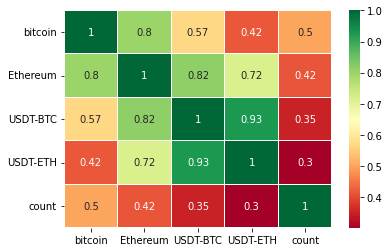

In [103]:
import seaborn as sns

sns.heatmap(outer_df.corr(),linewidths=0.1, cmap='RdYlGn', linecolor='white', annot=True)

In [106]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.model_selection import train_test_split


#학습데이터
cols_train = ['count']
X_train_pre = outer_df[cols_train]

#비트코인 가격
y = outer_df['USDT-BTC'].values

# 8:2 = 학습셋 : 테스트셋
X_train, X_test, y_train, y_test = train_test_split(X_train_pre, y, test_size = 0.2)

#모델 생성
model = Sequential()
model.add(Dense(10, input_dim = X_train.shape[1], activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1))
model.summary()

#모델 실행
model.compile(optimizer='adam', loss='mean_squared_error')

#20번 이상 결과가가 향상되지 않으면 종료
early_stopping_callback = EarlyStopping(monitor='val_loss', patience = 20)

#모델명
modelpath = './test_relu.hdf5'

#최적화 모델 업데이트 및 저장
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = "val_loss", verbose=0, save_best_only=True)

#실행관련 설정, 전체의 20% 
history = model.fit(X_train, y_train, validation_split=0.25, epochs = 10000, batch_size = 16, callbacks = [early_stopping_callback, checkpointer])


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 10)                20        
                                                                 
 dense_17 (Dense)            (None, 30)                330       
                                                                 
 dense_18 (Dense)            (None, 40)                1240      
                                                                 
 dense_19 (Dense)            (None, 1)                 41        
                                                                 
Total params: 1,631
Trainable params: 1,631
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10000
81/81 [==============================] - 1s 5ms/step - loss: 614146560.0000 - val_loss: 537534400.0000
Epoch 2/10000
81/81 [==============================] - 0s 3ms/step 

In [108]:
from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn.svm import SVR
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

y_target = outer_df['USDT-BTC']
X_data = outer_df.drop(['date','isPartial','bitcoin','Ethereum','USDT-ETH'], axis=1,inplace=False)

lr_reg = LinearRegression()
svr_reg = SVR()
ada_reg = AdaBoostRegressor()
xgb_reg = XGBRegressor()
lgb_reg = LGBMRegressor()

def get_model_cv_prediction(model, X_data, y_target):
  neg_mse_scores = cross_val_score(model, X_data, y_target,
  scoring="neg_mean_squared_error", cv = 5)
  rmse_scores = np.sqrt(-1 * neg_mse_scores)
  avg_rmse = np.mean(rmse_scores)
  print('##### ',model.__class__.__name__ , ' #####')
  print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

models = [lr_reg, svr_reg,ada_reg, xgb_reg, lgb_reg]
for model in models:
  get_model_cv_prediction(model, X_data, y_target)

#####  LinearRegression  #####
 5 교차 검증의 평균 RMSE : 0.000 
#####  SVR  #####
 5 교차 검증의 평균 RMSE : 15318.918 
#####  AdaBoostRegressor  #####
 5 교차 검증의 평균 RMSE : 1551.806 
[10:07:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:07:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:07:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:07:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:07:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
#####  XGBRegressor  #####
 5 교차 검증의 평균 RMSE : 416.174 
#####  LGBMRegressor  #####
 5 교차 검증의 평균 RMSE : 661.854 


네이버 트렌드 분석

In [ ]:
# from PyNaver import Naver

# # 애플리케이션 인증 정보
# client_id = "5fhRvdFKJjQu4YXHXN5g"
# client_secret = "xswJkfpqOT"

# # 네이버 API 인스턴스 생성
# naver = Naver(client_id, client_secret)

# # 파라미터
# startDate = "2017-01-01"
# endDate = "2022-11-16"
# timeUnit = "date"
# keywordGroups = [
#     {
#         "groupName": "Bitcoin",
#         "keywords": ["비트코인","Bitcoin"]
#     },

#     {
#         "groupName": "Ethereum",
#         "keywords": ["이더리움","ethereum"]
#     },
# ]

# # 실행
# df = naver.datalab_search(startDate=startDate,
#                           endDate=endDate,
#                           timeUnit=timeUnit,
#                           keywordGroups=keywordGroups)